# Proyek Analisis Data: [Bike-Sharing-dataset]
- **Nama:** [Dea Yuliani Sabrina]
- **Email:** [deayulianis788@gmil.com]
- **ID Dicoding:** [dea_yuliani_sabrina]

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda berdasarkan musim dan cuaca?
- Bagaimana memaksimalkan jumlah sepeda yang tersedia di lokasi tertentu pada waktu-waktu sibuk?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

## Data Wrangling

### Gathering Data

In [4]:
# Mengimpor data dari file CSV
hour_df = pd.read_csv('https://raw.githubusercontent.com/deayulianis/submission-DBS-1-/refs/heads/main/Bike-sharing-dataset/hour.csv')
day_df = pd.read_csv('https://raw.githubusercontent.com/deayulianis/submission-DBS-1-/refs/heads/main/Bike-sharing-dataset/day.csv')

# Memeriksa 5 baris pertama dari dataset untuk memastikan data dimuat dengan benar
print(hour_df.head())
print(day_df.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01   

**Insight:**
- Data yang digunakan sudah lengkap dan terstruktur dengan baik, dengan 17 kolom pada dataset hour.csv dan 16 kolom pada day.csv, masing-masing memiliki ribuan baris data.
- Kolom dteday pada kedua dataset bertipe data objek (string) dan mungkin perlu dikonversi ke tipe data datetime untuk memudahkan analisis berbasis waktu, seperti identifikasi tren musiman atau waktu sibuk.

### Assessing Data

In [6]:
# Memeriksa struktur data (jumlah baris dan kolom serta tipe data)
print(hour_df.info())
print(day_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeI

In [7]:
# Memeriksa missing values pada dataset
print("Missing values di hour.csv:")
print(hour_df.isnull().sum())

print("\nMissing values di day.csv:")
print(day_df.isnull().sum())

Missing values di hour.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing values di day.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [9]:
# Memeriksa apakah ada duplikat
print("Jumlah duplikasi di hour.csv:", hour_df.duplicated().sum())
print("Jumlah duplikasi di day.csv:", day_df.duplicated().sum())

Jumlah duplikasi di hour.csv: 0
Jumlah duplikasi di day.csv: 0


In [10]:
# Memeriksa nilai unik di setiap kolom kategori
kolom_kategori = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

print("Cek nilai unik untuk setiap kolom kategori:")
for kolom in kolom_kategori:
    print(f"Kolom '{kolom}': {hour_df[kolom].unique()}")

Cek nilai unik untuk setiap kolom kategori:
Kolom 'season': [1 2 3 4]
Kolom 'yr': [0 1]
Kolom 'mnth': [ 1  2  3  4  5  6  7  8  9 10 11 12]
Kolom 'hr': [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Kolom 'holiday': [0 1]
Kolom 'weekday': [6 0 1 2 3 4 5]
Kolom 'workingday': [0 1]
Kolom 'weathersit': [1 2 3 4]


In [11]:
# Memeriksa nilai unik di setiap kolom kategori
kolom_kategori = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

print("Cek nilai unik untuk setiap kolom kategori:")
for kolom in kolom_kategori:
    print(f"Kolom '{kolom}': {hour_df[kolom].unique()}")

Cek nilai unik untuk setiap kolom kategori:
Kolom 'season': [1 2 3 4]
Kolom 'yr': [0 1]
Kolom 'mnth': [ 1  2  3  4  5  6  7  8  9 10 11 12]
Kolom 'hr': [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Kolom 'holiday': [0 1]
Kolom 'weekday': [6 0 1 2 3 4 5]
Kolom 'workingday': [0 1]
Kolom 'weathersit': [1 2 3 4]


**Insight:**
- Dataset tidak memiliki missing values atau duplikat, yang berarti data yang digunakan sudah bersih dan siap untuk analisis lebih lanjut.
- olom kategori seperti season, yr, mnth, hr, holiday, weekday, workingday, dan weathersit berisi nilai-nilai yang terdefinisi dengan jelas, seperti season dengan nilai 1-4 untuk musim yang memungkinkan pemahaman yang lebih baik terhadap pola musiman.

### Cleaning Data

In [12]:
# Mengganti angka pada kolom 'season' dan 'weathersit' menjadi nama musim dan cuaca yang lebih deskriptif
hour_df['season'] = hour_df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
hour_df['weathersit'] = hour_df['weathersit'].replace({1: 'Clear', 2: 'Cloudy', 3: 'Rainy', 4: 'Stormy'})

# Memeriksa data setelah transformasi
print(hour_df[['season', 'weathersit', 'cnt']].head())

   season weathersit  cnt
0  Spring      Clear   16
1  Spring      Clear   40
2  Spring      Clear   32
3  Spring      Clear   13
4  Spring      Clear    1


**Insight:**
- Mengubah kode numerik di kolom season dan weathersit menjadi nama yang lebih deskriptif memudahkan interpretasi data, seperti mengganti angka untuk musim menjadi 'Spring', 'Summer', 'Fall', 'Winter' dan cuaca menjadi 'Clear', 'Cloudy', 'Rainy', 'Stormy'.
- Karena tidak ditemukan missing values atau duplikat yang signifikan dalam data, proses pembersihan cukup sederhana, berfokus pada perubahan format dan pemeliharaan konsistensi data untuk analisis selanjutnya.

## Exploratory Data Analysis (EDA)

### Explore ...

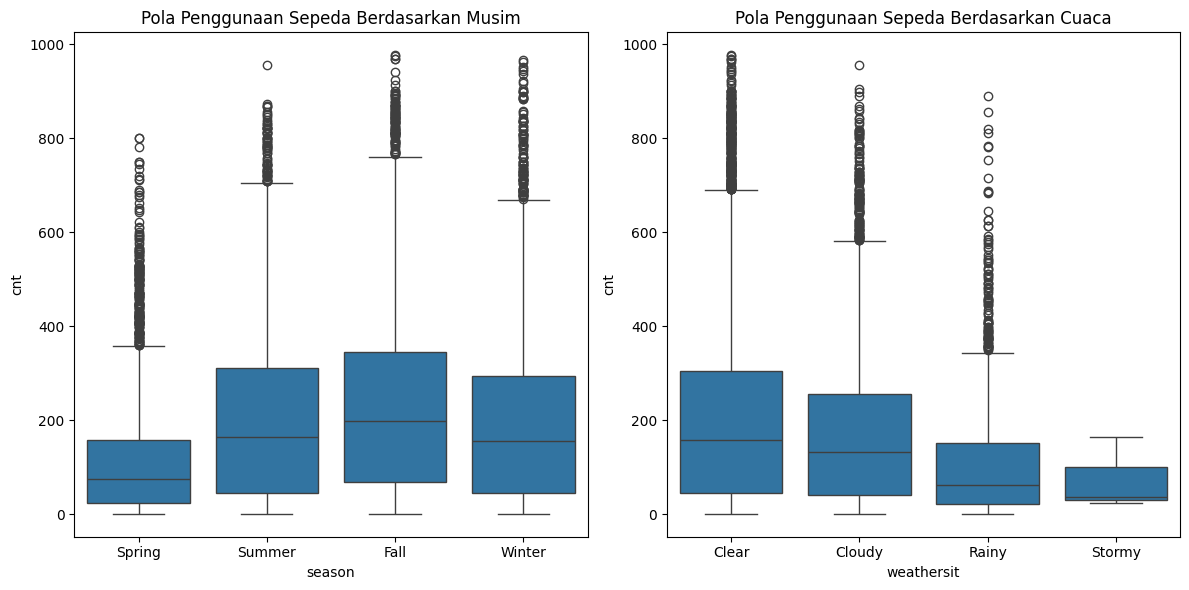

In [13]:
# Meneliti Hubungan Antara Musim, Cuaca, dan Jumlah Sepeda

# Membuat boxplot untuk melihat distribusi 'cnt' berdasarkan 'season' dan 'weathersit'
plt.figure(figsize=(12, 6))

# Boxplot untuk pola penggunaan sepeda berdasarkan musim
plt.subplot(1, 2, 1)
sns.boxplot(x='season', y='cnt', data=hour_df)
plt.title('Pola Penggunaan Sepeda Berdasarkan Musim')

# Boxplot untuk pola penggunaan sepeda berdasarkan cuaca
plt.subplot(1, 2, 2)
sns.boxplot(x='weathersit', y='cnt', data=hour_df)
plt.title('Pola Penggunaan Sepeda Berdasarkan Cuaca')

plt.tight_layout()
plt.show()

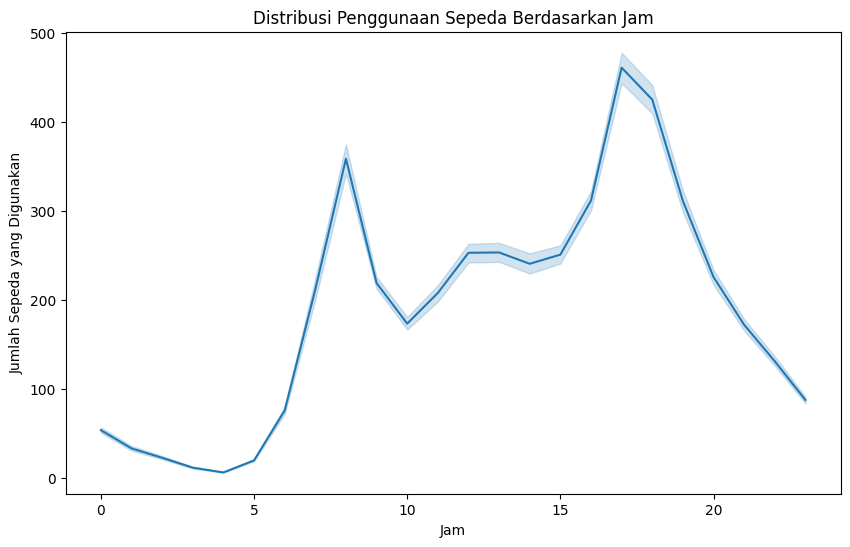

In [ ]:
# Menganalisis Jam Sibuk

# Menampilkan distribusi jumlah sepeda yang digunakan pada setiap jam
plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='cnt', data=hour_df)
plt.title('Distribusi Penggunaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Sepeda yang Digunakan')
plt.show()


**Insight:**
- Berdasarkan analisis boxplot, kita melihat bahwa penggunaan sepeda paling tinggi pada musim panas dan paling rendah pada musim dingin. Selain itu, penggunaan sepeda lebih tinggi saat cuaca cerah (Clear) dibandingkan dengan cuaca hujan atau badai.
- Dari distribusi penggunaan sepeda berdasarkan jam, terlihat adanya tren jam sibuk (pagi dan sore) di mana penggunaan sepeda lebih tinggi, yang mengindikasikan waktu-waktu ini adalah waktu kritis yang perlu dikelola untuk memaksimalkan ketersediaan sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

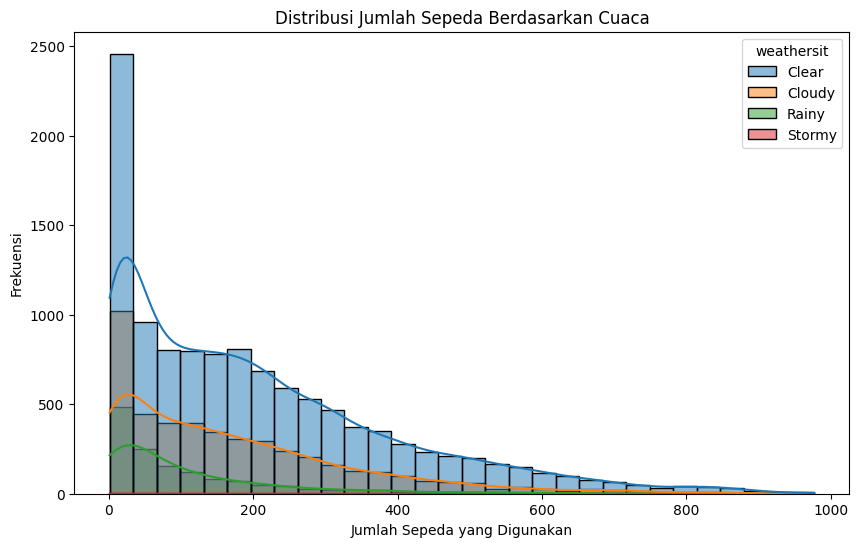

In [14]:
# Histogram untuk Jumlah Sepeda Berdasarkan Cuaca

# Histogram untuk melihat distribusi jumlah sepeda berdasarkan cuaca
plt.figure(figsize=(10, 6))
sns.histplot(hour_df, x='cnt', hue='weathersit', kde=True, bins=30)
plt.title('Distribusi Jumlah Sepeda Berdasarkan Cuaca')
plt.xlabel('Jumlah Sepeda yang Digunakan')
plt.ylabel('Frekuensi')
plt.show()

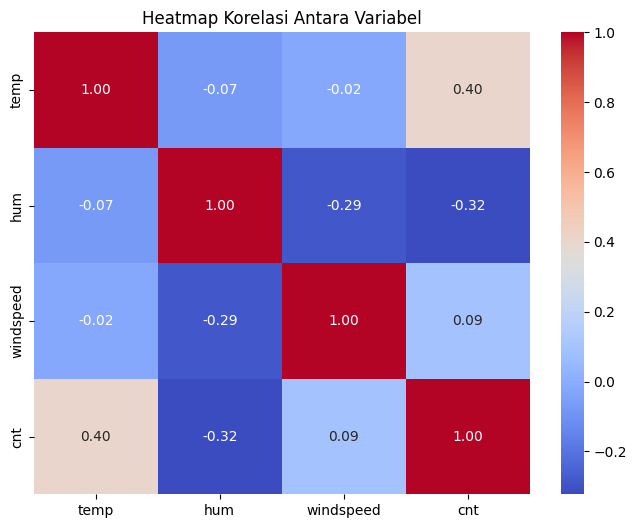

In [15]:
# Heatmap untuk Korelasi Antara Variabel

# Menghitung korelasi antar variabel
correlation_matrix = hour_df[['temp', 'hum', 'windspeed', 'cnt']].corr()

# Membuat heatmap untuk melihat korelasi antar variabel
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antara Variabel')
plt.show()

### Pertanyaan 2:

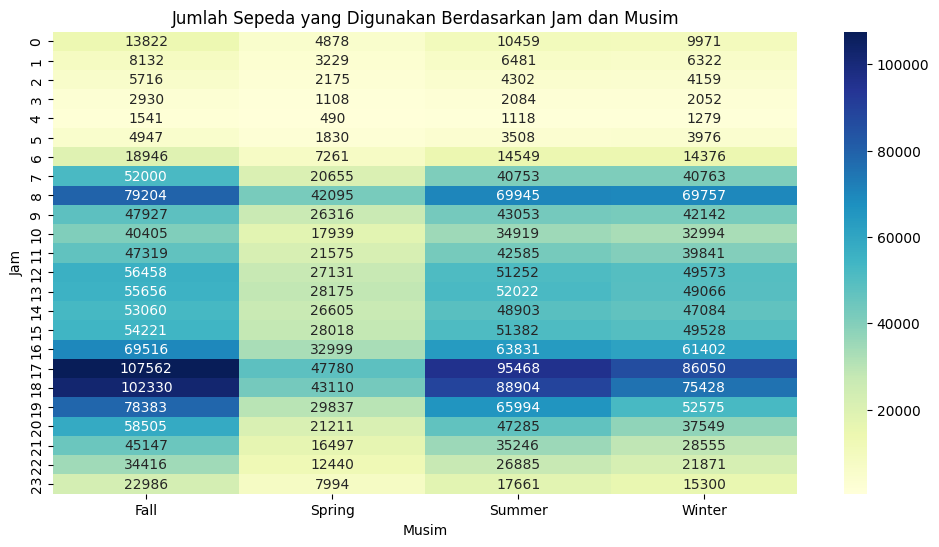

In [16]:
# Visualisasi untuk Mengidentifikasi Waktu Sibuk Berdasarkan Jam dan Musim
plt.figure(figsize=(12, 6))

# Heatmap Jam dan Musim
heatmap_data = hour_df.groupby(['hr', 'season'])['cnt'].sum().unstack()
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt='g')
plt.title('Jumlah Sepeda yang Digunakan Berdasarkan Jam dan Musim')
plt.xlabel('Musim')
plt.ylabel('Jam')

plt.show()

**Insight:**
- Histogram yang menunjukkan distribusi jumlah sepeda berdasarkan cuaca memperlihatkan bahwa cuaca cerah (Clear) mendominasi penggunaan sepeda. Ini bisa menjadi informasi penting bagi pengelola sepeda untuk lebih fokus pada distribusi sepeda pada hari-hari cerah.
- Dari heatmap korelasi, kita melihat bahwa ada hubungan positif yang kuat antara suhu (temp) dan penggunaan sepeda (cnt). Semakin tinggi suhu, semakin banyak sepeda yang digunakan, yang berarti pengelola sepeda bisa memperhatikan faktor cuaca untuk meningkatkan jumlah sepeda yang tersedia.